In [4]:
from keras.layers import Dense, Flatten, Dropout, Conv1D, LSTM
from keras import Sequential
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as spio
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import tensorflow as tf
from scipy.stats import pearsonr
from sklearn.datasets import load_diabetes

tf.keras.backend.set_floatx('float64')

In [5]:
df=load_diabetes()
X = df.data
y = df.target
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
y_train = np.expand_dims(y_train, axis=1)
y_test = np.expand_dims(y_test, axis=1)

In [6]:
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(10,1))) # 10 zmiennych objaśniających
model.add(Dropout(0.6))
model.add(Conv1D(64, 3, activation='relu'))
model.add(Dropout(0.6))
model.add(Conv1D(128, 3, activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(0.6))
model.add(Dense(30, activation='linear'))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 8, 32)             128       
                                                                 
 dropout (Dropout)           (None, 8, 32)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 6, 64)             6208      
                                                                 
 dropout_1 (Dropout)         (None, 6, 64)             0         
                                                                 
 conv1d_2 (Conv1D)           (None, 4, 128)            24704     
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 100)               5

In [7]:
model.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['mae', 'mse', 'acc'])

In [8]:
mymodel=model.fit(X_train,
          y_train,
          batch_size=10,
          epochs=200,
          verbose=0,
          validation_data=(X_test, y_test),
)

History:  dict_keys(['loss', 'mae', 'mse', 'acc', 'val_loss', 'val_mae', 'val_mse', 'val_acc'])


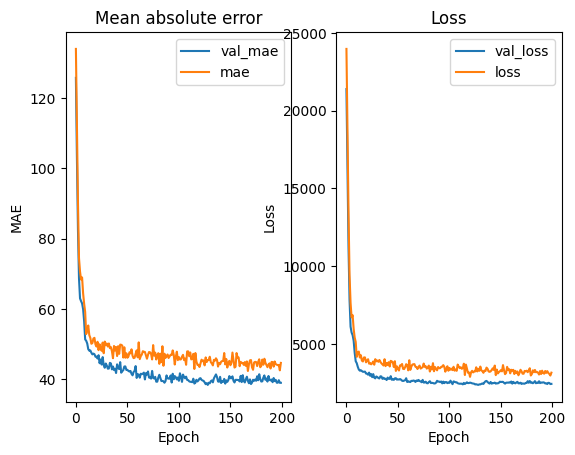

In [9]:
print('History: ', mymodel.history.keys())

plt.figure()
plt.subplot(1,2,1)
plt.plot(mymodel.history['val_mae'])
plt.plot(mymodel.history['mae'])
plt.title('Mean absolute error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['val_mae', 'mae'], loc = 'upper right')

plt.subplot(1,2,2)
plt.plot(mymodel.history['val_loss'])
plt.plot(mymodel.history['loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'loss'], loc = 'upper right')
plt.show()

TRAINING SET
12/12 [==============================] - 0s 3ms/step
RMSEC: 45.978631543386264
R^2 train:  0.6568617144395427


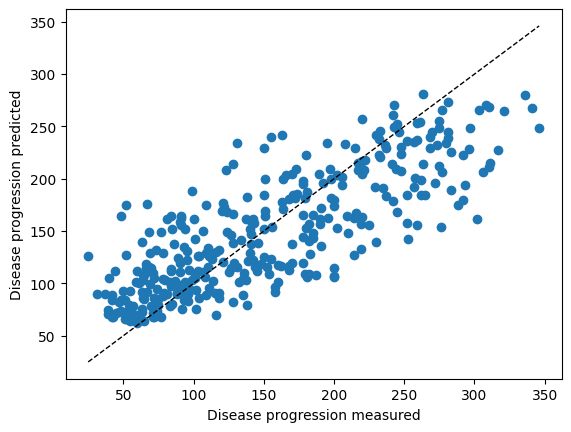

TEST SET
3/3 [==============================] - 0s 6ms/step
RMSEP: 49.310542871385636
R^2 test:  0.5634911865375135


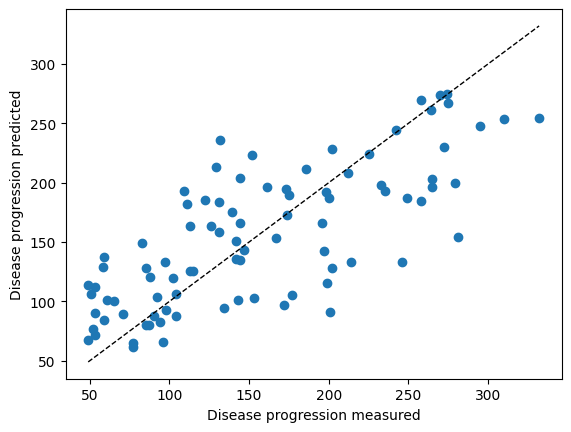

In [10]:
print('TRAINING SET');
pred_train= model.predict(X_train)
print('RMSEC:', np.sqrt(mean_squared_error(y_train,pred_train)))
corr,_ = pearsonr(y_train[:,0],pred_train[:,0])
print('R^2 train: ', corr**2)

fig, ax = plt.subplots()
ax.scatter(y_train, pred_train)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=1)
ax.set_xlabel('Disease progression measured')
ax.set_ylabel('Disease progression predicted')
plt.show()

print('TEST SET');
pred_test= model.predict(X_test)
print('RMSEP:', np.sqrt(mean_squared_error(y_test,pred_test)))
corr,_ = pearsonr(y_test[:,0],pred_test[:,0])
print('R^2 test: ', corr**2)

fig, ax = plt.subplots()
ax.scatter(y_test, pred_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
ax.set_xlabel('Disease progression measured')
ax.set_ylabel('Disease progression predicted')
plt.show()